# Discrete Random Variables and Sampling 

### George Tzanetakis, University of Victoria 

In this notebook we will explore discrete random variables and sampling. After defining a helper class and associated functions we will be able to create both symbolic and numeric random variables and generate samples from them. 


## A random variable class 

Define a helper random variable class based on the scipy discrete random variable functionality providing both numeric and symbolic RVs. You don't need to look at the implementation - the usage will be obvious through the examples below. 

In [18]:
%matplotlib inline 
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np 

class Random_Variable: 
    
    def __init__(self, name, values, probability_distribution): 
        self.name = name 
        self.values = values 
        self.probability_distribution = probability_distribution 
        if all(type(item) is np.int64 for item in self.values): 
            self.type = 'numeric'
            self.rv = stats.rv_discrete(name = name, 
                        values = (values, probability_distribution))
        elif all(type(item) is str for item in values): 
            self.type = 'symbolic'
            self.rv = stats.rv_discrete(name = name, 
                        values = (np.arange(len(values)), probability_distribution))
            self.symbolic_values = values 
        else: 
            self.type = 'undefined'
            
    def sample(self,size): 
        if (self.type =='numeric'): 
            return self.rv.rvs(size=size)
        elif (self.type == 'symbolic'): 
            numeric_samples = self.rv.rvs(size=size)
            mapped_samples = [self.values[x] for x in numeric_samples]
            return mapped_samples 
            
        

Let's first create some random samples of symbolic random variables corresponding to a coin and a dice 

In [22]:
values = ['H', 'T']
probabilities = [0.5, 0.5]
coin = Random_Variable('coin', values, probabilities)
samples = coin.sample(50)
print(samples)

['T', 'T', 'T', 'H', 'H', 'T', 'H', 'H', 'T', 'H', 'H', 'T', 'H', 'H', 'T', 'T', 'H', 'T', 'H', 'H', 'H', 'H', 'H', 'T', 'H', 'T', 'T', 'T', 'T', 'H', 'H', 'T', 'H', 'T', 'T', 'H', 'H', 'T', 'T', 'T', 'T', 'T', 'H', 'H', 'T', 'T', 'H', 'T', 'T', 'H']


In [23]:
values = ['1', '2', '3', '4', '5', '6']
probabilities = [1/6.] * 6
dice = Random_Variable('dice', values, probabilities)
samples = dice.sample(10)
print(samples);

['3', '1', '4', '2', '6', '2', '6', '3', '5', '5']


Now let's look at a numeric random variable corresponding to a dice so that we can more easily make plots and histograms

<Container object of 3 artists>

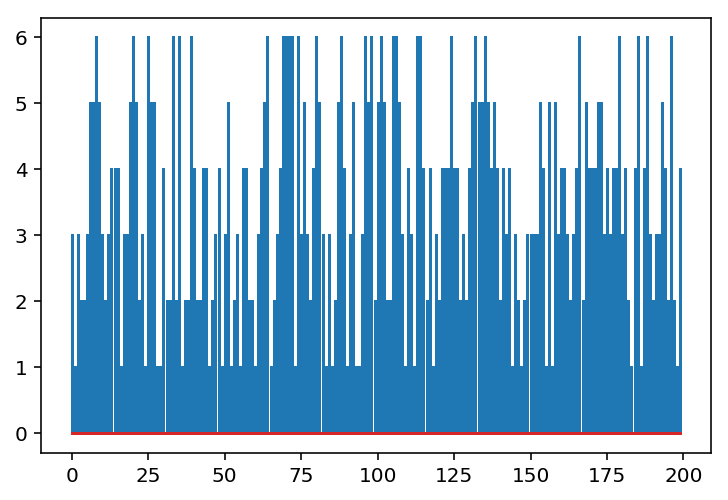

In [24]:
values = np.arange(1,7)
probabilities = [1/6.] * 6
dice = Random_Variable('dice', values, probabilities)
samples = dice.sample(200)
plt.stem(samples, markerfmt= ' ')

Let's now look at a histogram of these generated samples. Notice that even with 500 samples the bars are not equal length so the calculated frequencies are only approximating the probabilities used to generate them 

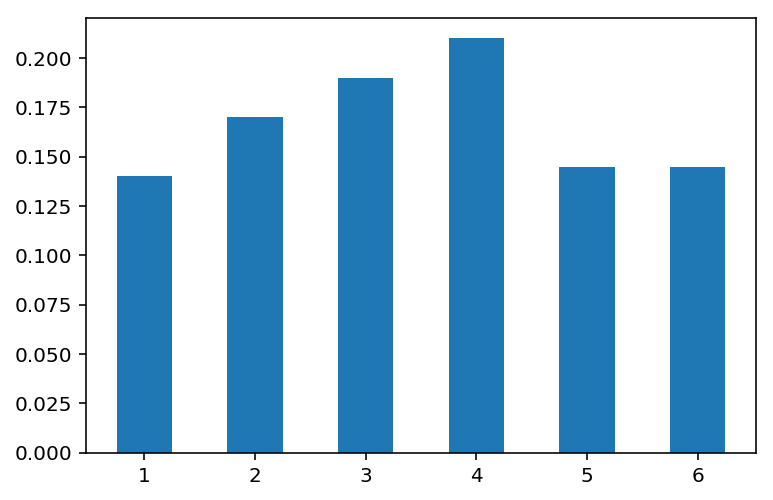

In [25]:
plt.figure()
plt.hist(samples,bins=[1,2,3,4,5,6,7],normed=1, rwidth=0.5,align='left');

Let's now plot the cumulative histogram of the samples. By observing the cumulative histogram you can see a possible way to sample any discrete probability distribution. The idea is to use a random number between 0.0 and 1.0 (programming languages typically provide a uniform random number generator that can be used for this purpose) and use it to "index" the y-axis of the histogram. If the number is between 0.0 and the height of the first bar then output 1, if it is between the height of the first bar and the second bar output 2, and so on. This is called the inverse transform method for sampling a distribution. It also works for arbitrary continuous probability densities for which the cumulative distribution can be computed either analytically or approximated numerically. (Note: there are other more efficient ways of sampling continuous densities) 

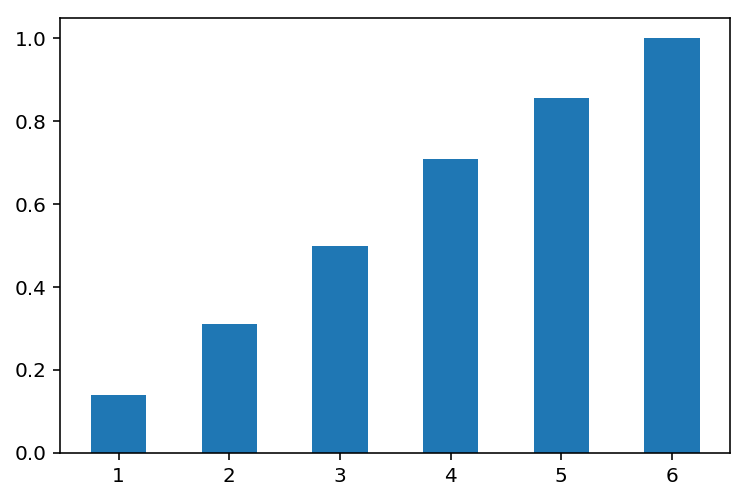

In [26]:
plt.hist(samples,bins=[1,2,3,4,5,6,7],normed=1, rwidth=0.5,align='left', cumulative=True);

Let's now estimate the frequency of the event *roll even number* in different ways. 
First let's directly count the number of even numbers in the generated samples. Then let's 
take the sum of the counts of the individual estimated probabilities. 


In [27]:

# we can also write the predicates directly using lambda notation 
est_even = len([x for x in samples if x%2==0]) / len(samples)
est_2 = len([x for x in samples if x==2]) / len(samples)
est_4 = len([x for x in samples if x==4]) / len(samples)
est_6 = len([x for x in samples if x==6]) / len(samples)
print(est_even)
# Let's print some estimates 
print('Estimates of 2,4,6 = ', (est_2, est_4, est_6))
print('Direct estimate = ', est_even) 
print('Sum of estimates = ', est_2 + est_4 + est_6)
print('Theoretical value = ', 0.5)

0.525
Estimates of 2,4,6 =  (0.17, 0.21, 0.145)
Direct estimate =  0.525
Sum of estimates =  0.525
Theoretical value =  0.5


Notice that we can always estimate the probability of an event by simply counting how many times it occurs in the samples of an experiment. However if we have multiple events we are interested in then it can be easier to calculate the probabilities of the values of invdividual random variables and then use the rules of probability to estimate the probabilities of more complex events. 

## Generating a random melody 

Just for fun let's generate a random melody. We will assume all notes have equal duration, there are no rests, and each note is equally likely. Using music21, a python package for symbolic music processing, we can generate a simple "score" using a simplified notation called tiny notation and then render it as a MIDI file that we can listen. 


First let's check that we can hear a melody specified in tiny notation. 

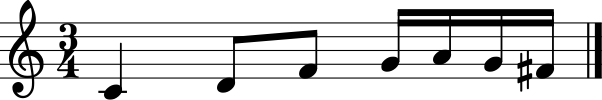

In [28]:
import music21 as m21 
from music21 import midi 

littleMelody = m21.converter.parse("tinynotation: 3/4 c4 d8 f g16 a g f#")
sp = midi.realtime.StreamPlayer(littleMelody)
littleMelody.show()
sp.play()

Now we can create a random variable with all 12 notes in a chromatic scale and generate a random melody of 10 notes by sampling it. 

['f#4', 'e4', 'a#4', 'g#4', 'b4', 'c4', 'g#4', 'd4', 'd#4', 'g4']
tinynotation: 4/4 ; c#4 c#4 d#4 f#4 e4 c4 d4 b4 a#4 g4


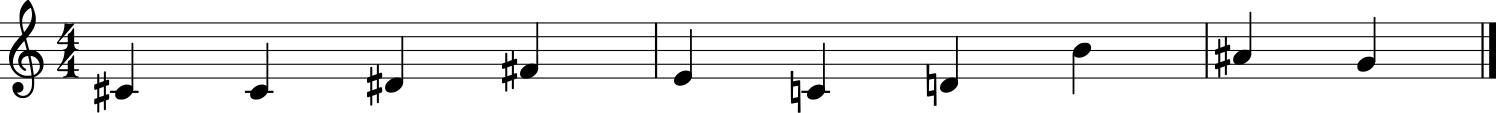

In [29]:
values = ['c4','c#4','d4','d#4', 'e4', 'f4','f#4', 'g4','g#4','a4','a#4','b4']
probabilities = [1/12.]*12 
note_rv = Random_Variable('note', values, probabilities)
print(note_rv.sample(10))
note_string = 'tinynotation: 4/4 ; ' + " ".join(note_rv.sample(10))
print(note_string)
randomMelody = m21.converter.parse(note_string)
sp = midi.realtime.StreamPlayer(randomMelody)
randomMelody.show()
sp.play()


Using music21 it is possible to load a particular Bach Chorale and play it using MIDI. 

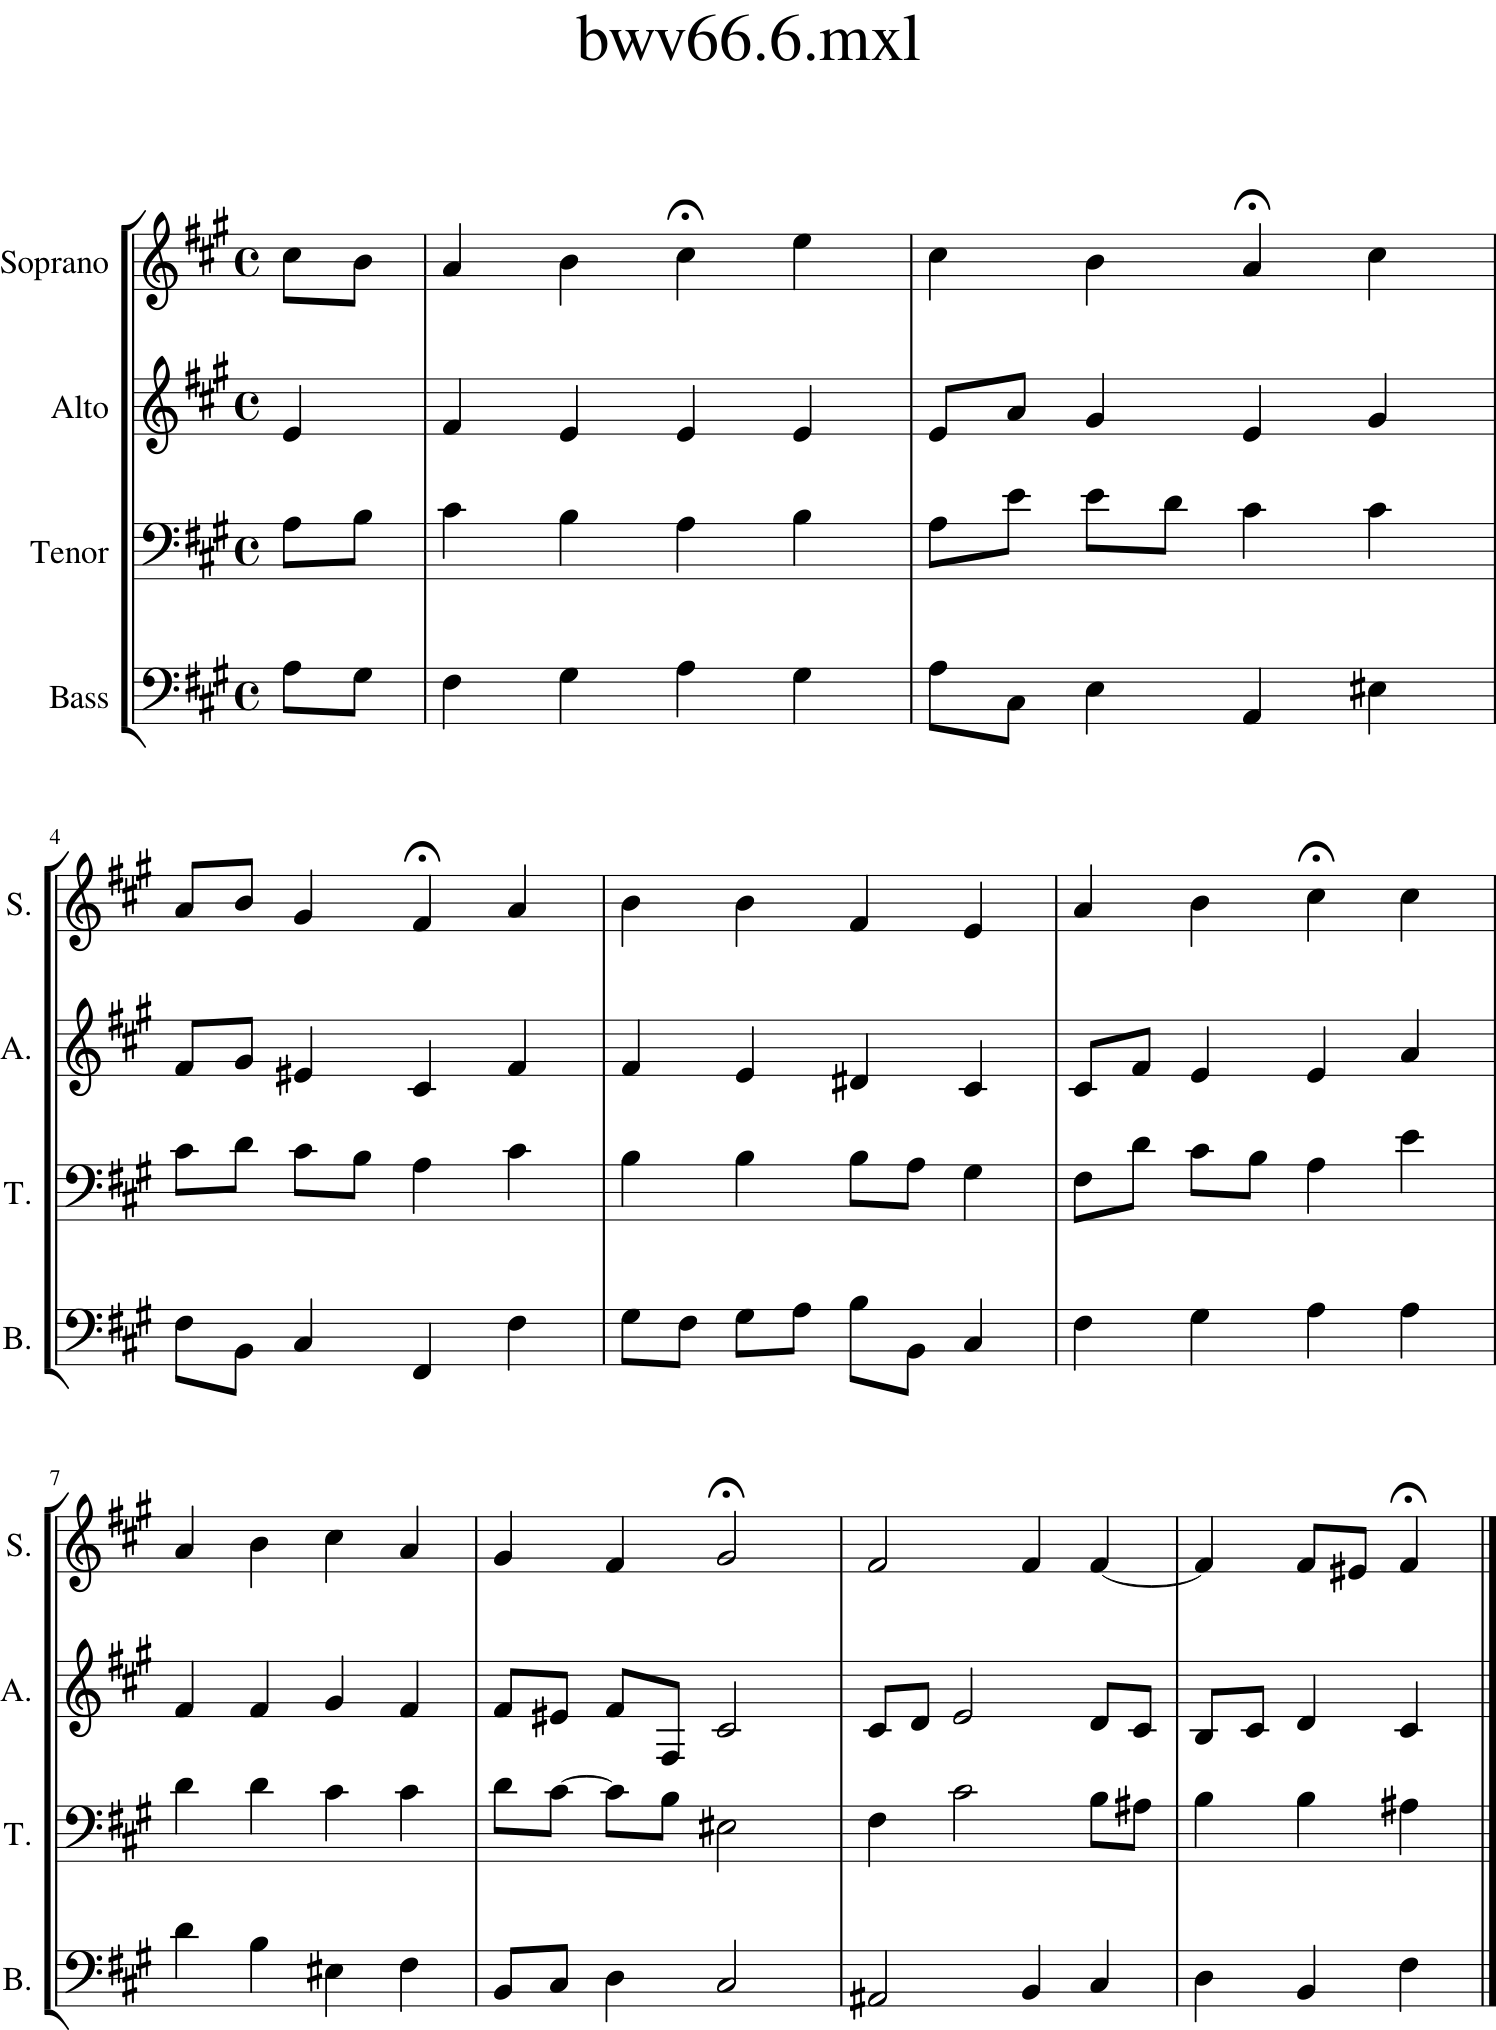

In [30]:
bachPiece = m21.corpus.parse('bwv66.6')
sp = midi.realtime.StreamPlayer(bachPiece)
bachPiece.show()
sp.play()


We can parse a whole bunch of chorales (in this case all the ones that are in C major) and derive probabilities for each note of the chromatic scale. That way we can estimate the probability density of notes and make a very simple "chorale" like random melody generator. Listen to how it sounds compared to the uniform random atonal melodies we heard before. I calculate the probabilities of each pitch class in chorale_probs and also compute a transition matrix that we will use later when exploring Markov Chains. This takes a a few minutes to process so be patient. There 405 chorales and 23 are in C major. You will see them slowly printed at the output. Wait until you see that the processing is finished - takes about a minute. 

In [31]:
chorales = m21.corpus.search('bach', fileExtensions='xml')
print(chorales)

chorale_probs = np.zeros(12)
totalNotes = 0 
transition_matrix = np.ones([12,12])     # hack of adding one to avoid 0 counts 
j = 0

for (i,chorale) in enumerate(chorales): 
    score = chorale.parse()
    analyzedKey = score.analyze('key')
    # only consider C major chorales 
    if (analyzedKey.mode == 'major') and (analyzedKey.tonic.name == 'C'): 
        j = j + 1 
        print(j,chorale)
        score.parts[0].pitches
        for (i,p) in enumerate(score.parts[0].pitches):  
            chorale_probs[p.pitchClass] += 1
            if i < len(score.parts[0].pitches)-1:
                transition_matrix[p.pitchClass][score.parts[0].pitches[i+1].pitchClass] += 1 
            totalNotes += 1

chorale_probs /= totalNotes  
transition_matrix /= transition_matrix.sum(axis=1,keepdims=1)
print('Finished processing')

<music21.metadata.bundles.MetadataBundle {405 entries}>
1 <music21.metadata.bundles.MetadataEntry: bach_bwv119_9_mxl>
2 <music21.metadata.bundles.MetadataEntry: bach_bwv130_6_mxl>
3 <music21.metadata.bundles.MetadataEntry: bach_bwv137_5_mxl>
4 <music21.metadata.bundles.MetadataEntry: bach_bwv149_7_mxl>
5 <music21.metadata.bundles.MetadataEntry: bach_bwv153_9_mxl>
6 <music21.metadata.bundles.MetadataEntry: bach_bwv156_6_mxl>
7 <music21.metadata.bundles.MetadataEntry: bach_bwv19_7_mxl>
8 <music21.metadata.bundles.MetadataEntry: bach_bwv25_6_mxl>
9 <music21.metadata.bundles.MetadataEntry: bach_bwv292_mxl>
10 <music21.metadata.bundles.MetadataEntry: bach_bwv293_mxl>
11 <music21.metadata.bundles.MetadataEntry: bach_bwv298_mxl>
12 <music21.metadata.bundles.MetadataEntry: bach_bwv31_9_mxl>
13 <music21.metadata.bundles.MetadataEntry: bach_bwv328_mxl>
14 <music21.metadata.bundles.MetadataEntry: bach_bwv346_mxl>
15 <music21.metadata.bundles.MetadataEntry: bach_bwv367_mxl>
16 <music21.metadata.bu

In [32]:
print("Note probabilities:")
print(chorale_probs)
print("Transition matrix:")
print(transition_matrix)



Note probabilities:
[ 0.18492462  0.00301508  0.11758794  0.00201005  0.11457286  0.07487437
  0.01105528  0.20603015  0.          0.17135678  0.00653266  0.1080402 ]
Transition matrix:
[[ 0.21428571  0.00274725  0.19505495  0.01373626  0.11538462  0.0467033
   0.01373626  0.1043956   0.00274725  0.09065934  0.00549451  0.19505495]
 [ 0.05555556  0.05555556  0.22222222  0.05555556  0.22222222  0.05555556
   0.05555556  0.05555556  0.05555556  0.05555556  0.05555556  0.05555556]
 [ 0.28455285  0.00813008  0.15853659  0.00406504  0.27235772  0.09756098
   0.03252033  0.07723577  0.00406504  0.02845528  0.00406504  0.02845528]
 [ 0.0625      0.0625      0.0625      0.0625      0.0625      0.0625
   0.0625      0.0625      0.0625      0.25        0.0625      0.125     ]
 [ 0.07142857  0.00420168  0.27731092  0.00420168  0.13445378  0.15966387
   0.02941176  0.18907563  0.00420168  0.10084034  0.0210084   0.00420168]
 [ 0.02484472  0.00621118  0.04347826  0.00621118  0.29192547  0.05590062


tinynotation: 4/4 ; f#4 a4 g4 d4 c4 c4 a4 b4 g4 b4 c4 c4 a4 a4 c4 e4


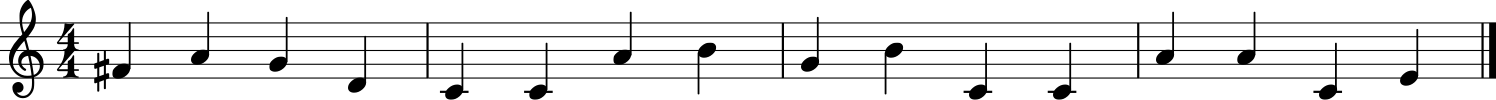

In [33]:
values = ['c4','c#4','d4','d#4', 'e4', 'f4','f#4', 'g4','g#4','a4','a#4','b4']
note_rv = Random_Variable('note', values, chorale_probs)
note_string = 'tinynotation: 4/4 ; ' + " ".join(note_rv.sample(16))
print(note_string)
randomChoraleMelody = m21.converter.parse(note_string)
sp = midi.realtime.StreamPlayer(randomChoraleMelody)
randomChoraleMelody.show()
sp.play()

In [34]:
def markov_chain(transmat, state, state_names, samples): 
    (rows, cols) = transmat.shape 
    rvs = [] 
    values = list(np.arange(0,rows))
    
    # create random variables for each row of transition matrix 
    for r in range(rows): 
        rv = Random_Variable("row" + str(r), values, transmat[r])
        rvs.append(rv)
    
    # start from initial state and then sample the appropriate 
    # random variable based on the state following the transitions 
    states = [] 
    for n in range(samples): 
        state = rvs[state].sample(1)[0]    
        states.append(state_names[state])
    return states


tinynotation: 4/4 ; a4 a4 g4 a4 g4 g4 a4 f4 a#4 c4 f#4 c4 a4 b4 c4 d4


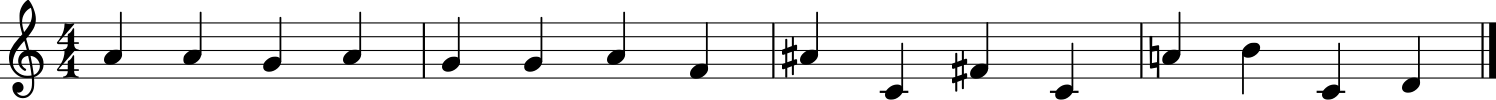

In [37]:
note_string = 'tinynotation: 4/4 ; ' + " ".join(markov_chain(transition_matrix,0,values, 16))
print(note_string)
markovChoraleMelody = m21.converter.parse(note_string)
sp = midi.realtime.StreamPlayer(markovChoraleMelody)
markovChoraleMelody.show()
sp.play()
